# 第十一次课-课后练习

本次作业是课后练习，供大家熟练课堂上讲授的基础知识点，不计入任何分数。

请将作业命名为 HW11-课后练习+姓名+学号.ipynb</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import jieba
import warnings
import re
warnings.filterwarnings('ignore')

## 一、中文商品评论数据的分类

本部分已经提供了参考输出，你的代码运行结果需要与之相同

### 1.1 中文语料预处理基础:分词(停用词表)

#### 1.1.1 输入数据，观察各类别评论数量
使用`pandas`输入数据，统计各类别语料的规模

In [2]:
pd_all=pd.read_csv(r'./online_shopping_10_cats.csv',encoding='utf-8')
pd_all

,cat,label,review
0,书籍,1,﻿做父母一定要有刘墉这样的心态，不断地学习，不断地进步，不断地给自己补充新鲜血液，让自己保持...
1,书籍,1,作者真有英国人严谨的风格，提出观点、进行论述论证，尽管本人对物理学了解不深，但是仍然能感受到...
2,书籍,1,作者长篇大论借用详细报告数据处理工作和计算结果支持其新观点。为什么荷兰曾经县有欧洲最高的生产...
3,书籍,1,作者在战几时之前用了＂拥抱＂令人叫绝．日本如果没有战败，就有会有美军的占领，没胡官僚主义的延...
4,书籍,1,作者在少年时即喜阅读，能看出他精读了无数经典，因而他有一个庞大的内心世界。他的作品最难能可贵...
...,...,...,...
62769,酒店,0,我们去盐城的时候那里的最低气温只有4度，晚上冷得要死，居然还不开空调，投诉到酒店客房部，得到...
62770,酒店,0,房间很小，整体设施老化，和四星的差距很大。毛巾太破旧了。早餐很简陋。房间隔音很差，隔两间房间...
62771,酒店,0,我感觉不行。。。性价比很差。不知道是银川都这样还是怎么的！
62772,酒店,0,房间时间长，进去有点异味！服务员是不是不够用啊！我在一楼找了半个小时以上才找到自己房间，想找...


In [3]:
# 统计各类别预料的规模
all_cats=pd_all['cat'].unique()
for cat in all_cats:
    # TODO
    # 将cat列中为cat的行提取出来，然后统计行数，并且统计lable=1的行数与lable=0的行数
    cat_pd = pd_all[pd_all['cat'] == cat]
    postive = cat_pd[cat_pd['label'] == 1]
    negtive = cat_pd[cat_pd['label'] == 0]
    print(f"{cat} , {len(cat_pd)} （总体）, {len(postive)} （正例）, {len(negtive)} （负例）")

书籍 , 3851 （总体）, 2100 （正例）, 1751 （负例）
平板 , 10000 （总体）, 5000 （正例）, 5000 （负例）
手机 , 2323 （总体）, 1165 （正例）, 1158 （负例）
水果 , 10000 （总体）, 5000 （正例）, 5000 （负例）
洗发水 , 10000 （总体）, 5000 （正例）, 5000 （负例）
热水器 , 575 （总体）, 475 （正例）, 100 （负例）
蒙牛 , 2033 （总体）, 992 （正例）, 1041 （负例）
衣服 , 10000 （总体）, 5000 （正例）, 5000 （负例）
计算机 , 3992 （总体）, 1996 （正例）, 1996 （负例）
酒店 , 10000 （总体）, 5000 （正例）, 5000 （负例）


#### 1.1.2 文本预处理
- 获取停用词表
- 对文本进行分词，保留中文，去除停用词

In [4]:
# 获取停用词表
file_path=r'./cn_stopwords.txt'
def get_stopwords(file_path):
    '''
    获取停用词表
    Return:
        stopwords (list of strings): 停用词表
    '''
    # TODO
    with open(file_path, 'r', encoding='utf-8') as f:
        stopwords = f.read().splitlines()
    
    return stopwords
    
stopwords=get_stopwords(file_path)
stopwords[:10]

['$', '0', '1', '2', '3', '4', '5', '6', '7', '8']

- 文本预处理
- 所有句子都变成空格分割，以方便调用sklearn的CountVectorizer
- 选1000个lable=1的句子，1000个lable=0的句子——取数据集中水果类别的前1000个和后1000个review
- 对去除的句子进行预处理，分词后的结果保存在corpus4bayes中

In [5]:
# 文本预处理
def preprocess(text, stopwords):
    '''预处理
       Params:
            text (string): 一个源数据中的句子
            stopwords (list of strings): 停用词表
       Return:
            text (string): 预处理后的句子
    '''
    # TODO
    # 调用jieba分词
    # 仅保留中文，其余去掉
    # 去掉停用词
    text = [word for word in jieba.cut(text)]
    text = [re.sub(r'[^\u4e00-\u9fa5]+', '', word) for word in text]
    text = [word for word in text if word not in stopwords]
    
    return text

# TODO
fruit = pd_all[pd_all['cat'] == '水果']
pos_fruit = fruit[:1000]['review']
neg_fruit = fruit[-1000:]['review']
corpus = list(pos_fruit) + list(neg_fruit)
corpus = [preprocess(sent, stopwords) for sent in corpus]
corpus4bayes = [' '.join(sent) for sent in corpus]
corpus4bayes[:5]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\HBK\AppData\Local\Temp\jieba.cache


Loading model cost 3.030 seconds.
Prefix dict has been built successfully.


[' 好吃  下次 买宏辉 果蔬    好些  甜  一分钱 一分货  日期 新鲜',
 '第一次 购买 潘 苹果  甘肃 产  口感 属于 那种 粉粉  脆  感觉 陕西 那种 脆 好吃 ',
 '棒棒 哒  京东 太给力  苹果 没有 吃  看起来 不错',
 '水果 新鲜  希望 多出 特价 水果 ',
 '好吃 好吃 好吃 好吃      吃 买  喜欢']

### 1.2 在语料库级别对词汇特征进行统计:TF，IDF

- 声明TFIDF模型，默认df值从1开始，也可以设置属性过滤掉一些低频值
- 设置token_pattern=r"(?u)\b\w+\b"，包含单个汉字的词

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
# TODO
count_vec = CountVectorizer(token_pattern=r"(?u)\b\w+\b")
words_vec = count_vec.fit_transform(corpus4bayes)

print(words_vec.shape)

(2000, 4058)


- 获取需要训练的特征`feature`
- 获取训练集和测试集 
- 用`np.random.choice`随机选取80%的数据作为训练集，剩下的作为测试集

In [7]:
# TODO
features = pd.DataFrame(words_vec.toarray())
train_index = np.random.choice(features.index, size=int(len(features)*0.8), replace=False)
features4train = features[features.index.isin(train_index)]
features4test = features[~features.index.isin(train_index)]
print(features4test.shape,features4train.shape)
features4test.head()

(400, 4058) (1600, 4058)


,0,1,2,3,4,5,6,7,8,9,...,4048,4049,4050,4051,4052,4053,4054,4055,4056,4057
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- 获取训练所需的标签`label`

In [8]:
# TODO
labels = pd.Series([1 for _ in range(1000)] + [0 for _ in range(1000)])
label4train = labels[features.index.isin(train_index)]
label4test = labels[~features.index.isin(train_index)]
print(label4test.shape,label4train.shape)
label4test.head()

(400,) (1600,)


3     1
9     1
26    1
30    1
31    1
dtype: int64

- 构建数据集的函数`construct_features`
- 构建训练集与测试集
- 进行贝叶斯分类

In [69]:
import nltk
# 获取特征名
feature_names=count_vec.get_feature_names_out()
# 构建特征
def construct_features(features,labels,feature_names):
    # TODO
    feature_list = []
    for i in range(features.shape[0]):
        text_feature = {}
        for j in range(features.shape[1]):
            text_feature[feature_names[j]] = features.iloc[i, j]
        feature_list.append((text_feature, labels[i]))
    return feature_list

# TODO
# 构建训练集和测试集
train_dataset = construct_features(features4train, label4train.tolist(), feature_names)
test_dataset = construct_features(features4test, label4test.tolist(), feature_names)
classifier = nltk.NaiveBayesClassifier.train(train_dataset)
print(nltk.classify.accuracy(classifier, test_dataset))
classifier.show_most_informative_features(5)

0.9125
Most Informative Features
                     火龙果 = 1                   0 : 1      =     45.3 : 1.0
                      很甜 = 1                   1 : 0      =     16.3 : 1.0
                      不错 = 2                   1 : 0      =     16.2 : 1.0
                      很脆 = 1                   1 : 0      =     16.1 : 1.0
                      三个 = 1                   0 : 1      =     15.9 : 1.0


### 1.3 引入外部语言资源：情感词典

读取情感词典，并保留其‘词语’，‘强度’，‘极性’三列为优化分类做准备

In [10]:
df=pd.read_excel(r'./情感词汇.xlsx',keep_default_na=False)
df=df[['词语','强度','极性']]
df.head()

,词语,强度,极性
0,脏乱,7,2
1,糟报,5,2
2,早衰,5,2
3,责备,5,2
4,贼眼,5,2


将词语->极性和词语->强度的映射关系整理为两个新的字典，方便之后的处理操作

In [11]:
# TODO
sentiment_words= dict(zip(df["词语"], df["极性"]))
strength_words=dict(zip(df["词语"], df["强度"]))
sentiment_words

{'脏乱': 2,
 '糟报': 2,
 '早衰': 2,
 '责备': 2,
 '贼眼': 2,
 '战祸': 2,
 '招灾': 2,
 '折辱': 2,
 '中山狼': 2,
 '清峻': 0,
 '清莹': 1,
 '轻倩': 1,
 '晴丽': 1,
 '求索': 1,
 '热潮': 1,
 '仁政': 1,
 '荣名': 1,
 '柔腻': 1,
 '瑞雪': 1,
 '擅名': 1,
 '神采': 1,
 '省便': 1,
 '盛开': 1,
 '盛誉': 1,
 '诗仙': 1,
 '爽脆': 1,
 '素洁': 1,
 '诪张': 2,
 '株连': 2,
 '坠毁': 2,
 '滋生': 2,
 '自恃': 2,
 '走后门': 2,
 '阻力': 2,
 '罪状': 2,
 '做戏': 2,
 '甜头': 1,
 '头名': 1,
 '婉妙': 1,
 '温淑': 1,
 '稳厚': 1,
 '沃壤': 1,
 '无上': 1,
 '喜人': 1,
 '先贤': 1,
 '鲜妍': 1,
 '相称': 1,
 '骁骑': 1,
 '新巧': 1,
 '新意': 1,
 '信奉': 1,
 '急智': 1,
 '技艺': 1,
 '雄劲': 1,
 '雄肆': 1,
 '秀俊': 1,
 '煦煦': 1,
 '勋绩': 1,
 '雅淡': 1,
 '雅兴': 1,
 '严整': 1,
 '泱泱': 1,
 '怡悦': 1,
 '义诊': 1,
 '英发': 1,
 '英伟': 1,
 '莹润': 1,
 '勇健': 1,
 '优厚': 1,
 '幽雅': 1,
 '有识': 1,
 '友邻': 1,
 '玉人': 1,
 '元勋': 1,
 '佳句': 1,
 '佳趣': 1,
 '兼爱': 1,
 '坚守': 1,
 '简雅': 1,
 '荐举': 1,
 '见称': 1,
 '见闻': 1,
 '奖旗': 1,
 '奖许': 1,
 '姣丽': 1,
 '娇丽': 1,
 '骄子': 1,
 '解惑': 1,
 '津要': 1,
 '金嗓子': 1,
 '匀净': 1,
 '赞词': 1,
 '真纯': 1,
 '箴言': 1,
 '珍玩': 1,
 '正理': 1,
 '指导': 1,
 '至理': 1,
 '致敬': 1,
 '智多星':

- 获取数据集中的关于书籍的数据

In [12]:
target_cats=['书籍']
# 去除书籍的评论数据
pd_data=pd_all[pd_all.cat.isin(target_cats)]
# 将句序号加入dataframe中，位之后的处理做准备
sentence_id=[i+1 for i in range(len(pd_data))]
pd_data['sentence_id']=sentence_id
pd_data

,cat,label,review,sentence_id
0,书籍,1,﻿做父母一定要有刘墉这样的心态，不断地学习，不断地进步，不断地给自己补充新鲜血液，让自己保持...,1
1,书籍,1,作者真有英国人严谨的风格，提出观点、进行论述论证，尽管本人对物理学了解不深，但是仍然能感受到...,2
2,书籍,1,作者长篇大论借用详细报告数据处理工作和计算结果支持其新观点。为什么荷兰曾经县有欧洲最高的生产...,3
3,书籍,1,作者在战几时之前用了＂拥抱＂令人叫绝．日本如果没有战败，就有会有美军的占领，没胡官僚主义的延...,4
4,书籍,1,作者在少年时即喜阅读，能看出他精读了无数经典，因而他有一个庞大的内心世界。他的作品最难能可贵...,5
...,...,...,...,...
3846,书籍,0,"买回来才知道,一点都不好看....",3847
3847,书籍,0,不怎么样拉，都是很烂的笑话加几个单词而已，贵哦。得考虑呢。。。,3848
3848,书籍,0,做为一本声名在外的流行书，说的还是广州的外企，按道理应该和我的生存环境差不多啊。但是一看之下...,3849
3849,书籍,0,说实话，从理论上来说，别说求医就是求人也不如求己，但是，很多时候我们自己无法完成的事情，只能...,3850


- 评论数据预处理，切分
- 将切分后的数据作为新的一列`word`加入到数据集中，按照课件中的操作，将切分的词用空格连接为string

In [15]:
# TODO
words = [preprocess(sent, stopwords) for sent in list(pd_data["review"])]
words = [' '.join(word) for word in words]
pd_data["word"] = pd.Series(words)
pd_data.head()

,cat,label,review,sentence_id,word
0,书籍,1,﻿做父母一定要有刘墉这样的心态，不断地学习，不断地进步，不断地给自己补充新鲜血液，让自己保持...,1,做 父母 一定 刘墉 心态 不断 学习 不断 进步 不断 补充 新鲜血液 保持 一...
1,书籍,1,作者真有英国人严谨的风格，提出观点、进行论述论证，尽管本人对物理学了解不深，但是仍然能感受到...,2,作者 真有 英国人 严谨 风格 提出 观点 进行 论述 论证 物理学 了解 不深 仍...
2,书籍,1,作者长篇大论借用详细报告数据处理工作和计算结果支持其新观点。为什么荷兰曾经县有欧洲最高的生产...,3,作者 长篇大论 借用 详细 报告 数据处理 工作 计算结果 支持 其新 观点 荷兰 曾经 ...
3,书籍,1,作者在战几时之前用了＂拥抱＂令人叫绝．日本如果没有战败，就有会有美军的占领，没胡官僚主义的延...,4,作者 战 之前 拥抱 令人 叫绝 日本 没有 战败 会 美军 占领 没胡 官僚主义...
4,书籍,1,作者在少年时即喜阅读，能看出他精读了无数经典，因而他有一个庞大的内心世界。他的作品最难能可贵...,5,作者 少年 时即 喜 阅读 看出 精读 无数 经典 一个 庞大 内心世界 作品 难能可...


- 设计通过情感词典进行的句子情感特征提取，设计初步方案

In [43]:
def sentiment_analysis(df,sentiment_words,strength_words):
    '''
    sentiment_score:该句的总情感强度得分
    positive_score:该句的正向情感强度得分
    negative_score:该句的负向情感强度得分
    '''
    sentiment_score=0
    positive_score=0
    negative_score=0
    # 遍历当前句的每个词
    # TODO
    for w in df["word"].split():
        if w in sentiment_words.keys():
            if sentiment_words[w] == 1:
                sentiment_score += strength_words[w]
                positive_score += strength_words[w]
            if sentiment_words[w] == 2:
                sentiment_score -= strength_words[w]
                negative_score += strength_words[w]
                
    return sentiment_score,positive_score,negative_score            

- 构造新的特征（三个score）`new_features`
- 获取数据的标签`labels`

In [44]:
feature_dict = {"sentiment_score":[], "positive_score":[], "negative_score":[]}
labels = {"label":[]}
for i in range(len(pd_data)):
    sentiment_score, positive_score, negative_score = sentiment_analysis(pd_data.iloc[i], sentiment_words, strength_words)
    feature_dict["sentiment_score"].append(sentiment_score)
    feature_dict["positive_score"].append(positive_score)
    feature_dict["negative_score"].append(negative_score)
    labels["label"].append(pd_data.iloc[i]["label"])

new_features = pd.DataFrame(feature_dict)
labels = pd.DataFrame(labels)
new_features, labels

(      sentiment_score  positive_score  negative_score
 0                  12              29              17
 1                  28              28               0
 2                  35              35               0
 3                   7              21              14
 4                  35              38               3
 ...               ...             ...             ...
 3846                0               0               0
 3847               -3               0               3
 3848                5              10               5
 3849               -1               7               8
 3850               24              31               7
 
 [3851 rows x 3 columns],
       label
 0         1
 1         1
 2         1
 3         1
 4         1
 ...     ...
 3846      0
 3847      0
 3848      0
 3849      0
 3850      0
 
 [3851 rows x 1 columns])

常规的向量化-降维-贝叶斯分类训练

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# TODO
# 进行训练集和测试集的划分，test_size=0.1
X_train, X_test, y_train, y_test = train_test_split(new_features, labels, test_size=0.1)
# 进行贝叶斯模型的初始化和训练
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# # 在测试集上进行预测
y_pred = gnb.predict(X_test)
# 计算预测的效果，使用f1_score
f1 = f1_score(y_test, y_pred)
print('F1 score:',f1)

F1 score: 0.6422018348623852


#### 1.3.1 情感词典优化

In [46]:
# 情感分析函数
def my_sentiment_analysis(df,sentiment_words,strength_words):
    '''
    sentiment_score:该句的总情感强度得分
    positive_score:该句的正向情感强度得分
    negative_score:该句的负向情感强度得分
    sentiment:该句的情感极性，1表示正向，0表示负向
    positive_count:正向词占比
    negative_count:负向词占比
    '''
    positive_count=0
    negative_count=0
    positive_score=0
    negative_score=0
    
    length=len(df)
    
    # TODO
    sentiment_score = 0
    for w in df["word"].split():
        if w in sentiment_words.keys():
            if sentiment_words[w] == 1:
                positive_score += strength_words[w]
                positive_count += 1
            elif sentiment_words[w] == 2:
                negative_score += strength_words[w]
                negative_count += 1
    sentiment_score = (positive_score - negative_score)
    sentiment = 1 if sentiment_score > 0 else 0
    positive_count = positive_count / length
    negative_count = negative_count / length
    return sentiment_score,positive_score,negative_score,sentiment,positive_count,negative_count

- 构造新的特征`new_features1`

In [47]:
# TODO
feature_dict = {"sentiment_score":[], "positive_score":[], "negative_score":[], "sentiment":[], "positive_count":[], "negative_count":[]}
for i in range(len(pd_data)):
    sentiment_score, positive_score, negative_score, sentiment, positive_count, negtive_count = my_sentiment_analysis(pd_data.iloc[i], sentiment_words, strength_words)
    feature_dict["sentiment_score"].append(sentiment_score)
    feature_dict["positive_score"].append(positive_score)
    feature_dict["negative_score"].append(negative_score)
    feature_dict["sentiment"].append(sentiment)
    feature_dict["positive_count"].append(positive_count)
    feature_dict["negative_count"].append(negtive_count)

new_features1 = pd.DataFrame(feature_dict)
new_features1

,sentiment_score,positive_score,negative_score,sentiment,positive_count,negative_count
0,12,29,17,1,1.0,0.6
1,28,28,0,1,1.2,0.0
2,35,35,0,1,1.4,0.0
3,7,21,14,1,0.6,0.4
4,35,38,3,1,1.6,0.2
...,...,...,...,...,...,...
3846,0,0,0,0,0.0,0.0
3847,-3,0,3,0,0.0,0.2
3848,5,10,5,1,0.4,0.2
3849,-1,7,8,0,0.2,0.4


使用新的特征进行常规的向量化-降维-贝叶斯分类训练

In [48]:
# TODO
X_train, X_test, y_train, y_test = train_test_split(new_features1, labels, test_size=0.1)
gnb1 = GaussianNB()
gnb1.fit(X_train, y_train)
y_pred = gnb1.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('F1 score:',f1)

F1 score: 0.73015873015873


- 加入新的特征之后进行情感分析

In [49]:
def my_sentiment_analysis1(df,sentiment_words,strength_words,category_words,dict4catwords):
    sentiment_score=0
    positive_score=0
    negative_score=0
    category_score=0
    
    # TODO
    for w in df['word'].split():
        if w in sentiment_words.keys():
            category_score += dict4catwords[category_words[w]]
            if sentiment_words[w] == 1:
                sentiment_score += strength_words[w]
                positive_score += strength_words[w]
            if sentiment_words[w] == 2:
                sentiment_score -= strength_words[w]
                negative_score += strength_words[w]
                
        
    return sentiment_score,positive_score,negative_score,category_score

In [50]:
df=pd.read_excel(r'./情感词汇.xlsx',keep_default_na=False)
df=df[['词语','强度','极性','情感分类']]
category_words=dict(zip(df['词语'],df['情感分类']))
dict4catwords=dict(df.groupby('情感分类')['词语'].count())
df.head(),category_words,dict4catwords

(   词语  强度  极性 情感分类
 0  脏乱   7   2   NN
 1  糟报   5   2   NN
 2  早衰   5   2   NE
 3  责备   5   2   NN
 4  贼眼   5   2   NN,
 {'脏乱': 'NN',
  '糟报': 'NN',
  '早衰': 'NE',
  '责备': 'NN',
  '贼眼': 'NN',
  '战祸': 'ND',
  '招灾': 'NN',
  '折辱': 'NE',
  '中山狼': 'NN',
  '清峻': 'PH',
  '清莹': 'PH',
  '轻倩': 'PH',
  '晴丽': 'PH',
  '求索': 'PH',
  '热潮': 'PH',
  '仁政': 'PH',
  '荣名': 'PH',
  '柔腻': 'PH',
  '瑞雪': 'PA',
  '擅名': 'PD',
  '神采': 'PA',
  '省便': 'PH',
  '盛开': 'PH',
  '盛誉': 'PH',
  '诗仙': 'PH',
  '爽脆': 'PH',
  '素洁': 'PH',
  '诪张': 'NN',
  '株连': 'NN',
  '坠毁': 'NB',
  '滋生': 'NN',
  '自恃': 'NN',
  '走后门': 'NN',
  '阻力': 'NN',
  '罪状': 'NN',
  '做戏': 'NN',
  '甜头': 'PB',
  '头名': 'PH',
  '婉妙': 'PH',
  '温淑': 'PB',
  '稳厚': 'PH',
  '沃壤': 'PH',
  '无上': 'PH',
  '喜人': 'PA',
  '先贤': 'PD',
  '鲜妍': 'PH',
  '相称': 'PH',
  '骁骑': 'PH',
  '新巧': 'PH',
  '新意': 'PH',
  '信奉': 'PG',
  '急智': 'PH',
  '技艺': 'PH',
  '雄劲': 'PH',
  '雄肆': 'PH',
  '秀俊': 'PH',
  '煦煦': 'PH',
  '勋绩': 'PH',
  '雅淡': 'PH',
  '雅兴': 'PH',
  '严整': 'PH',
  '泱泱': 'PH',
  '怡悦': '

- 构造新的特征`new_features2`

In [57]:
# TODO
feature_dict = {"sentiment_score":[], "positive_score":[], "negative_score":[], "category_score":[]}
for i in range(len(pd_data)):
    sentiment_score, positive_score, negative_score, category_score = my_sentiment_analysis1(pd_data.iloc[i], sentiment_words, strength_words, category_words, dict4catwords)
    feature_dict["sentiment_score"].append(sentiment_score)
    feature_dict["positive_score"].append(positive_score)
    feature_dict["negative_score"].append(negative_score)
    feature_dict["category_score"].append(category_score)

new_features2 = pd.DataFrame(feature_dict)
new_features2

,sentiment_score,positive_score,negative_score,category_score
0,12,29,17,72532
1,28,28,0,21717
2,35,35,0,68188
3,7,21,14,34156
4,35,38,3,61748
...,...,...,...,...
3846,0,0,0,0
3847,-3,0,3,15166
3848,5,10,5,18200
3849,-1,7,8,9775


使用新的特征进行常规的向量化-降维-贝叶斯分类训练

In [58]:
# TODO
X_train, X_test, y_train, y_test = train_test_split(new_features2, labels, test_size=0.1)
gnb2 = GaussianNB()
gnb2.fit(X_train, y_train)
y_pred = gnb2.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('F1 score:',f1)

F1 score: 0.6666666666666666


## 二、网络(图)分析基础

### 2.1 熟悉图分析软件包NetworkX的基本使用

#### 2.1.1 图的创建
请按照给出的例子创建一个无向图，并绘制带节点标签的图片(具体相对位置可能有所不同，保证节点和边一致即可)

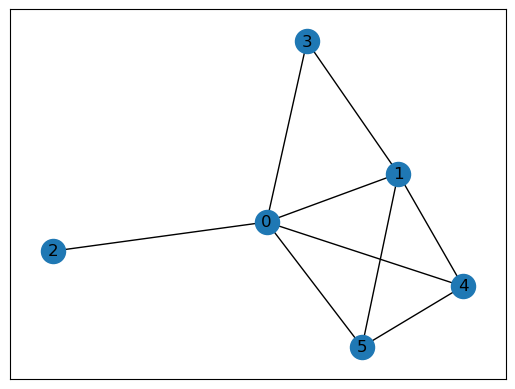

In [15]:
import networkx as nx 
edges = [(0, 2), (0, 3), (1, 3), (0, 1), (0, 4), (0, 5), (1, 4), (1, 5), (4, 5)]
G = nx.Graph()
G.add_edges_from(edges)
nx.draw_networkx(G, with_labels=True)


#### 2.1.2 修改Graph
对上面的无向图进行修改，添加6号节点，添加边（1，6），并绘制带标签的图片

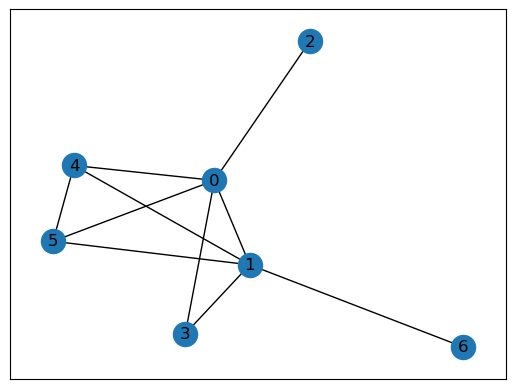

In [16]:
#TODO:
G.add_edge(1, 6)
nx.draw_networkx(G, with_labels=True)

### 2.1.3 添加节点属性
对每一个节点添加weight属性，其值为节点的度数，并绘制带标签的图片，要求节点的大小和weight的大小成正比

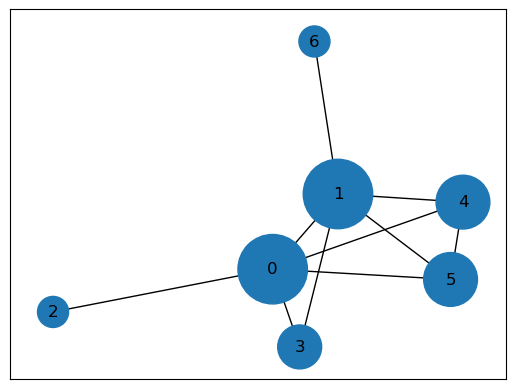

In [22]:
#TODO:
for node in G.nodes():
    G.nodes[node]["weight"] = G.degree[node]

node_sizes = [500*G.nodes[node]['weight'] for node in G.nodes()]
nx.draw_networkx(G, with_labels=True, node_size=node_sizes)

#### 2.1.4 点中心度计算
计算每个节点的点中心度，并将其作为centrality属性添加到节点属性中，并按照示例输出打印节点的信息

In [24]:
#TODO:
centrality = nx.degree_centrality(G)

for node, value in centrality.items():
    G.nodes[node]["centrality"] = value

for node, attrs in G.nodes(data=True):
    print(f"Node:{node}	Attributes: {attrs}")

Node:0	Attributes: {'weight': 5, 'centrality': 0.8333333333333333}
Node:2	Attributes: {'weight': 1, 'centrality': 0.16666666666666666}
Node:3	Attributes: {'weight': 2, 'centrality': 0.3333333333333333}
Node:1	Attributes: {'weight': 5, 'centrality': 0.8333333333333333}
Node:4	Attributes: {'weight': 3, 'centrality': 0.5}
Node:5	Attributes: {'weight': 3, 'centrality': 0.5}
Node:6	Attributes: {'weight': 1, 'centrality': 0.16666666666666666}
